In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\my files\Scraped Data\weather.csv")
df.head()

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (C)
0,Partly Cloudy,rain,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,9.472222
1,Partly Cloudy,rain,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,9.355556
2,Mostly Cloudy,rain,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,9.377778
3,Partly Cloudy,rain,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,8.288889
4,Mostly Cloudy,rain,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,8.755556


In [3]:
df.shape

(96453, 10)

In [4]:
df.columns

Index(['Summary', 'Precip Type', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Temperature (C)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 96453 non-null  object 
 1   Precip Type             95936 non-null  object 
 2   Humidity                96453 non-null  float64
 3   Wind Speed (km/h)       96453 non-null  float64
 4   Wind Bearing (degrees)  96453 non-null  int64  
 5   Visibility (km)         96453 non-null  float64
 6   Loud Cover              96453 non-null  int64  
 7   Pressure (millibars)    96453 non-null  float64
 8   Daily Summary           96453 non-null  object 
 9   Temperature (C)         96453 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 7.4+ MB


<AxesSubplot:>

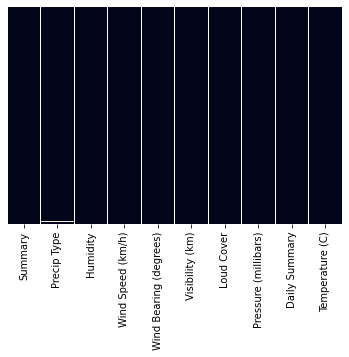

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

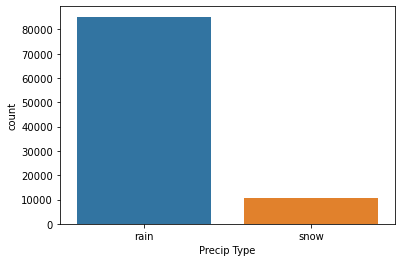

In [8]:
sns.countplot(x="Precip Type",data=df)

In [9]:
df["Precip Type"].fillna("rain",inplace=True)
df.isnull().sum()

Summary                   0
Precip Type               0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
Daily Summary             0
Temperature (C)           0
dtype: int64

<AxesSubplot:xlabel='Summary', ylabel='count'>

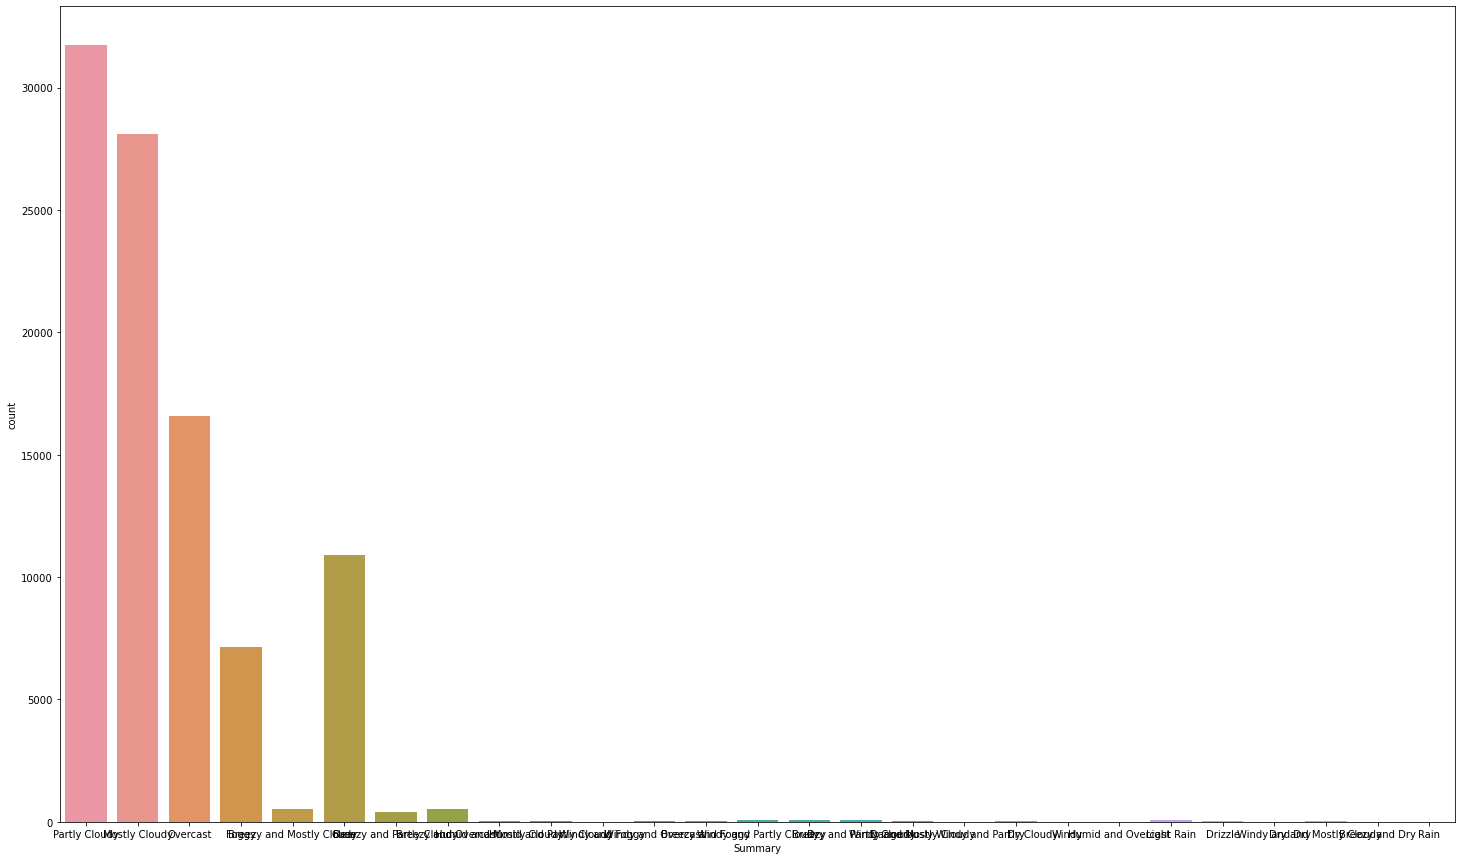

In [12]:
plt.figure(figsize=(25,15))
sns.countplot(x="Summary",data=df)

In [13]:
df["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [14]:
df.drop("Loud Cover",inplace=True,axis=1)

In [15]:
df.head()

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (C)
0,Partly Cloudy,rain,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,9.472222
1,Partly Cloudy,rain,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,9.355556
2,Mostly Cloudy,rain,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,9.377778
3,Partly Cloudy,rain,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,8.288889
4,Mostly Cloudy,rain,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,8.755556


In [17]:
req_cols = ["Summary","Daily Summary"]
for cols in req_cols:
    df[cols]=df[cols].astype("category")
    df[cols]=df[cols].cat.codes
df.head()

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (C)
0,19,rain,0.89,14.1197,251,15.8263,1015.13,197,9.472222
1,19,rain,0.86,14.2646,259,15.8263,1015.63,197,9.355556
2,17,rain,0.89,3.9284,204,14.9569,1015.94,197,9.377778
3,19,rain,0.83,14.1036,269,15.8263,1016.41,197,8.288889
4,17,rain,0.83,11.0446,259,15.8263,1016.51,197,8.755556


In [18]:
df.describe()

,Summary,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (C)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,16.006024,0.734899,10.810640,187.509232,10.347325,1003.235956,129.308057,11.932678
std,4.361497,0.195473,6.913571,107.383428,4.192123,116.969906,56.275398,9.551546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.822222
25%,17.000000,0.600000,5.828200,116.000000,8.339800,1011.900000,95.000000,4.688889
50%,18.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,118.000000,12.000000
75%,19.000000,0.890000,14.135800,290.000000,14.812000,1021.090000,181.000000,18.838889
max,26.000000,1.000000,63.852600,359.000000,16.100000,1046.380000,213.000000,39.905556


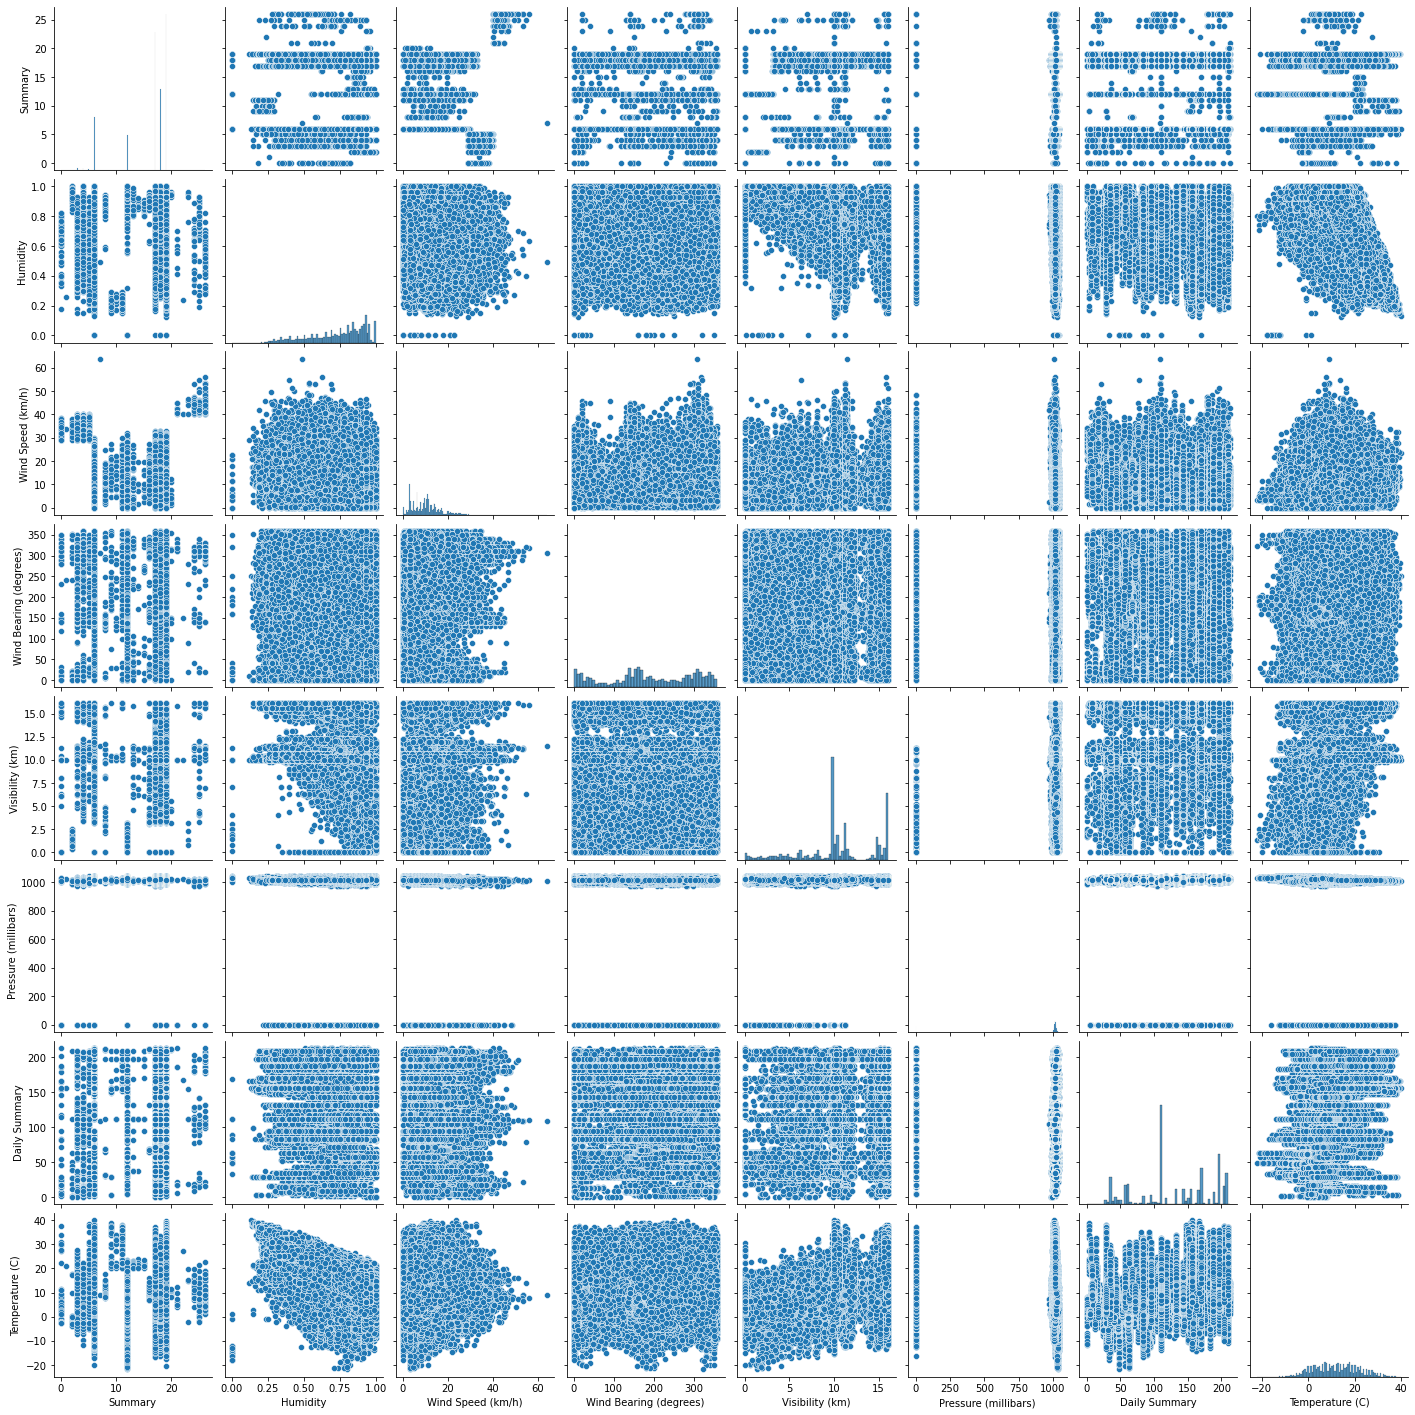

In [19]:
sns.pairplot(df)

<AxesSubplot:>

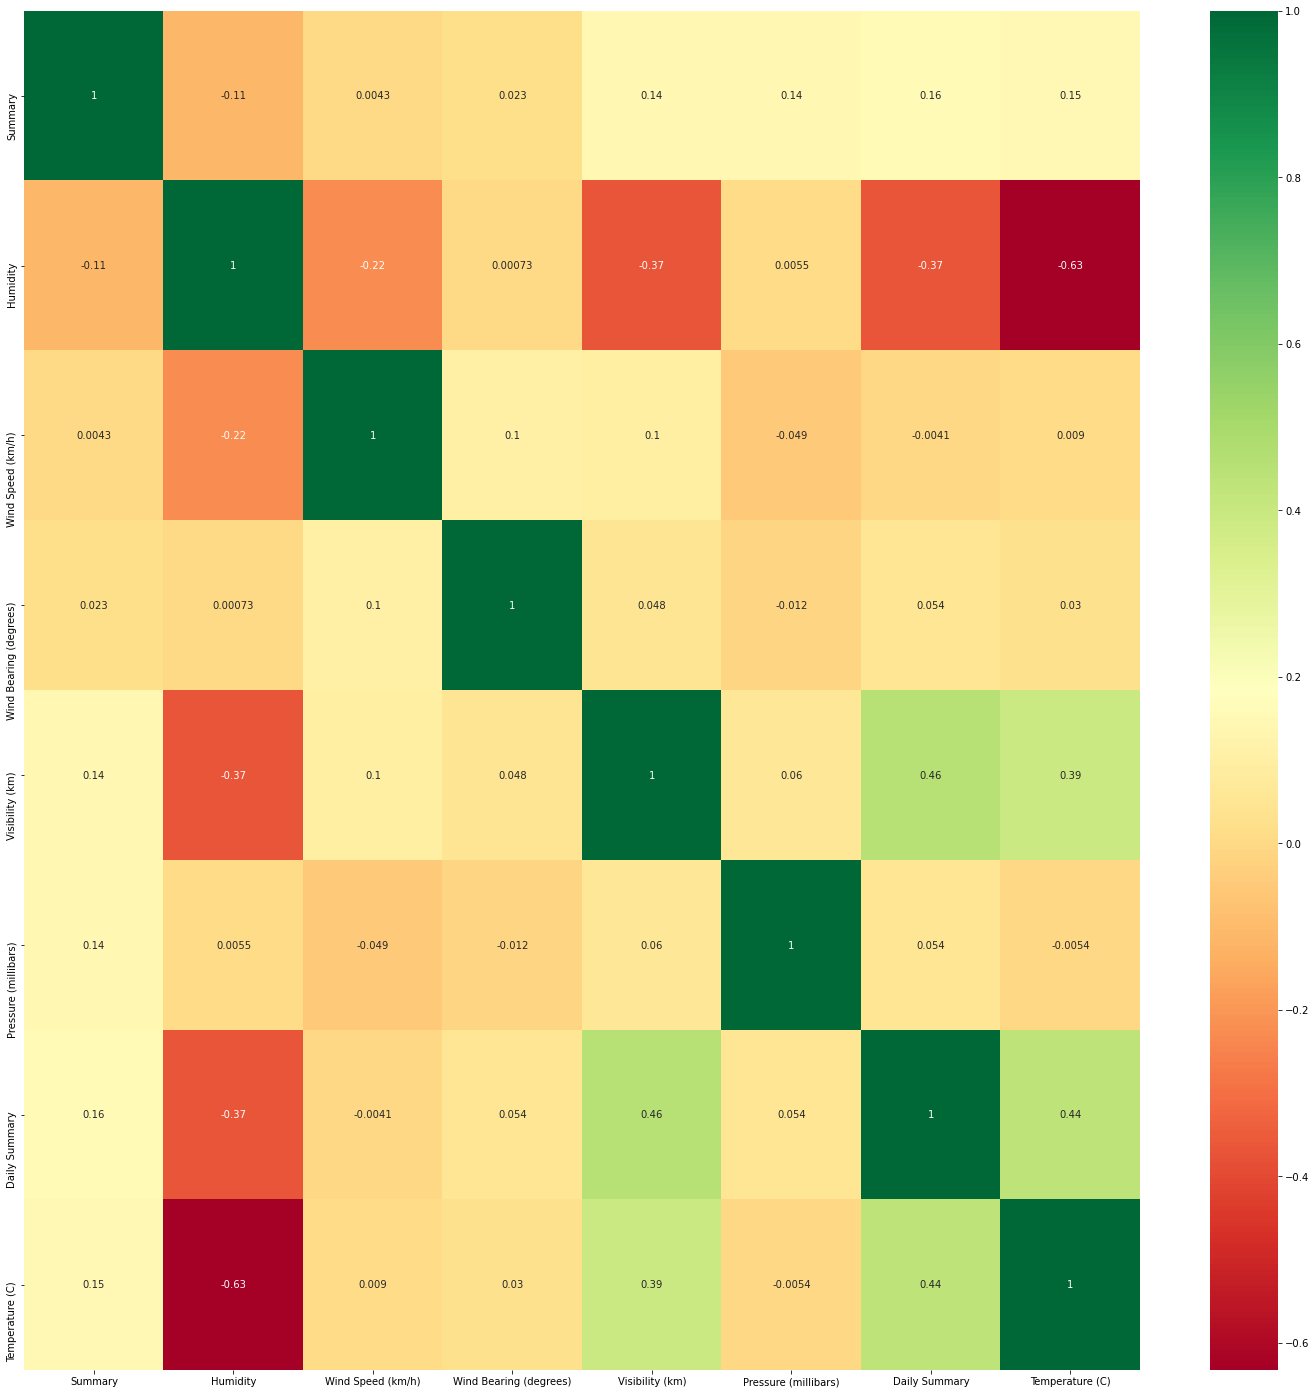

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [21]:
df.corr()

,Summary,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (C)
Summary,1.000000,-0.113119,0.004258,0.022789,0.140138,0.143405,0.157569,0.146658
Humidity,-0.113119,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.368180,-0.632255
Wind Speed (km/h),0.004258,-0.224951,1.000000,0.103822,0.100749,-0.049263,-0.004115,0.008957
Wind Bearing (degrees),0.022789,0.000735,0.103822,1.000000,0.047594,-0.011651,0.053709,0.029988
Visibility (km),0.140138,-0.369173,0.100749,0.047594,1.000000,0.059818,0.457913,0.392847
Pressure (millibars),0.143405,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.054305,-0.005447
Daily Summary,0.157569,-0.368180,-0.004115,0.053709,0.457913,0.054305,1.000000,0.438879
Temperature (C),0.146658,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.438879,1.000000


In [22]:
# check multicolinearity
df.iloc[:,:-1].corr()

,Summary,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Summary,1.000000,-0.113119,0.004258,0.022789,0.140138,0.143405,0.157569
Humidity,-0.113119,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.368180
Wind Speed (km/h),0.004258,-0.224951,1.000000,0.103822,0.100749,-0.049263,-0.004115
Wind Bearing (degrees),0.022789,0.000735,0.103822,1.000000,0.047594,-0.011651,0.053709
Visibility (km),0.140138,-0.369173,0.100749,0.047594,1.000000,0.059818,0.457913
Pressure (millibars),0.143405,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.054305
Daily Summary,0.157569,-0.368180,-0.004115,0.053709,0.457913,0.054305,1.000000


In [23]:
# we have to drop humidity column because highly -ve correlation with temperature
df.drop("Humidity",inplace=True,axis=1)
df.head()

,Summary,Precip Type,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (C)
0,19,rain,14.1197,251,15.8263,1015.13,197,9.472222
1,19,rain,14.2646,259,15.8263,1015.63,197,9.355556
2,17,rain,3.9284,204,14.9569,1015.94,197,9.377778
3,19,rain,14.1036,269,15.8263,1016.41,197,8.288889
4,17,rain,11.0446,259,15.8263,1016.51,197,8.755556


In [28]:
df["Precip Type"]=df["Precip Type"].astype("category")
df["Precip Type"]=df["Precip Type"].cat.codes

In [30]:
df.head()

,Summary,Precip Type,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (C)
0,19,0,14.1197,251,15.8263,1015.13,197,9.472222
1,19,0,14.2646,259,15.8263,1015.63,197,9.355556
2,17,0,3.9284,204,14.9569,1015.94,197,9.377778
3,19,0,14.1036,269,15.8263,1016.41,197,8.288889
4,17,0,11.0446,259,15.8263,1016.51,197,8.755556


In [31]:
X = df.iloc[:,:-1]
y = df["Temperature (C)"]
y.shape

(96453,)

In [32]:
X.shape

(96453, 7)

In [33]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outlier = lof.fit_predict(X)
outlier[0:7]

array([1, 1, 1, 1, 1, 1, 1])

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()
X_train.shape

(77162, 7)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ("std scaler",StandardScaler())
                             ])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

11.94635125523657
[ 0.36972317 -4.35370217 -0.31648253 -0.06697674  1.24331814 -0.27322886
  2.49488567]


In [37]:
pred = lm.predict(X_test)
pred

array([18.45239043, 12.65737042, 12.86948749, ..., -5.32411241,
        8.71472334, 13.2038567 ])

In [38]:
pred_train = lm.predict(X_train)
pred_train

array([ 8.80534367, -6.02797933, 13.02650608, ..., 13.67376997,
       11.90185517,  9.22467914])

In [55]:
from sklearn import metrics
def test_evaluate(t,p):
    mae = metrics.mean_absolute_error(t,p)
    mse = metrics.mean_squared_error(t,p)
    rmse = np.sqrt(metrics.mean_squared_error(t,p))
    r_square = metrics.r2_score(t,p)
    print("MAE",mae)
    print("MSE",mse)
    print("RMSE",rmse)
    print("R_SQUARE",r_square)
    
def train_evaluate(t,p):
    mae = metrics.mean_absolute_error(t,p)
    mse = metrics.mean_squared_error(t,p)
    rmse = np.sqrt(metrics.mean_squared_error(t,p))
    r_square = metrics.r2_score(t,p)
    print("MAE",mae)
    print("MSE",mse)
    print("RMSE",rmse)
    print("R_SQUARE",r_square)
        
        

<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

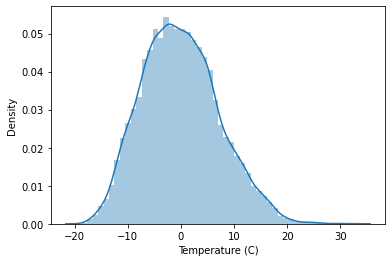

In [56]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(y_test-pred)

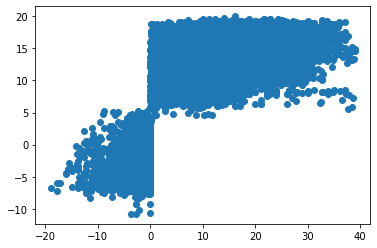

In [57]:
plt.scatter(y_test,pred)

In [58]:
test_evaluate(y_test,pred)

MAE 5.834030272971482
MSE 52.13132648075388
RMSE 7.220202662027838
R_SQUARE 0.4249128252999703


In [59]:
train_evaluate(y_train,pred_train)

MAE 5.822000340510176
MSE 52.31411647397848
RMSE 7.232849816910239
R_SQUARE 0.42748249088351464


In [76]:
from sklearn.model_selection import cross_val_score
lm_score = cross_val_score(lm,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
lm_score_rmse = np.sqrt(-lm_score)
lm_score_rmse

array([7.19450488, 7.30366961, 7.19340335, 7.26898713, 7.14287158,
       7.31277483, 7.33602566, 7.20125916, 7.25337988, 7.12355668])

In [77]:
lm_score_rmse.mean()

7.2330432760133805

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-4,1e-2,1e-1,1,3,9,15,25,30,35,45,55,75,100]}
ridge_reg = GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 0.1, 1, 3,
                                   9, 15, 25, 30, 35, 45, 55, 75, 100]},
             scoring='neg_mean_squared_error')

In [80]:
print(ridge_reg.best_params_)


{'alpha': 35}


In [83]:
ridge = Ridge(alpha=35,random_state=0)
ridge_model = ridge.fit(X_train,y_train)
pred2 = ridge.predict(X_test)
pred2

array([18.45107477, 12.65742676, 12.86879313, ..., -5.31835299,
        8.71421939, 13.20368441])

In [84]:
test_evaluate(y_test,pred2)

MAE 5.833944122967399
MSE 52.13123946346713
RMSE 7.220196636066579
R_SQUARE 0.4249137852319146


<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

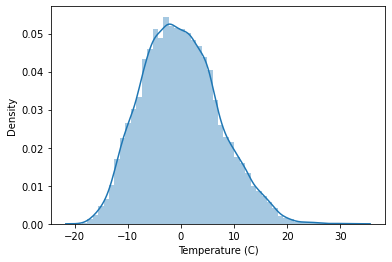

In [85]:
sns.distplot(y_test-pred2)

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-4,1e-2,1e-1,1,3,9,15,25,30,35,45,55,75,100]}
lasso_reg = GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 0.1, 1, 3,
                                   9, 15, 25, 30, 35, 45, 55, 75, 100]},
             scoring='neg_mean_squared_error')

In [87]:
print(lasso_reg.best_params_)

{'alpha': 0.0001}


In [90]:
lasso = Lasso(alpha=0.0001)
lasso_model = lasso.fit(X_train,y_train)
pred3 = lasso.predict(X_test)
pred3

array([18.45217745, 12.65756083, 12.86926235, ..., -5.32349071,
        8.71462905, 13.20385232])

In [91]:
test_evaluate(y_test,pred3)

MAE 5.834029221018953
MSE 52.131366768905536
RMSE 7.22020545198719
R_SQUARE 0.4249123808608801


In [95]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=277)
knn_model = knn.fit(X_train,y_train)
pred4 = knn.predict(X_test)
pred4

array([15.62468913, 13.73269154, 13.31163257, ...,  1.75280786,
        6.04811472, 13.87418773])

In [96]:
test_evaluate(y_test,pred4)

MAE 5.932208747546086
MSE 56.02057965614979
RMSE 7.4846896833569385
R_SQUARE 0.38200849557497674


<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

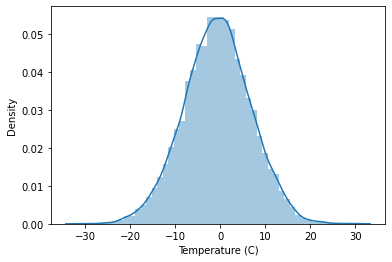

In [97]:
sns.distplot(y_test-pred4)

In [98]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train,y_train)
pred5 = dt.predict(X_test)
pred5

array([16.73333333, 16.91666667, 16.18333333, ..., -2.88888889,
        5.06666667, 21.96111111])

<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

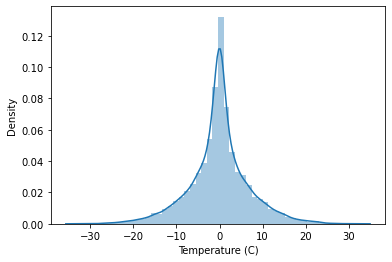

In [99]:
sns.distplot(y_test-pred5)

In [100]:
test_evaluate(y_test,pred5)

MAE 4.807507434840789
MSE 47.897566075710856
RMSE 6.920806750351497
R_SQUARE 0.47161758948033183


In [103]:
pred_train2 = dt.predict(X_train)
pred_train2

array([ 0.02222222, -6.2       ,  7.27222222, ..., 13.57777778,
       17.63888889, 13.83333333])

In [104]:
train_evaluate(y_train,pred_train2)

MAE 0.0009680211042482053
MSE 0.003199901571712131
RMSE 0.05656767249686106
R_SQUARE 0.9999649807776422


In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40)
rf_model = rf.fit(X_train,y_train)
pred6 = rf.predict(X_test)
pred6

array([14.97680556, 11.85847222, 17.45041667, ..., -4.32527778,
        7.87527778, 20.92472222])

In [109]:
test_evaluate(y_test,pred6)

MAE 3.651306474740698
MSE 24.418155090674606
RMSE 4.941472967716671
R_SQUARE 0.730630912918214


In [110]:
pred_train3 = rf.predict(X_train)
pred_train3

array([ 2.60375   , -6.46597222,  9.61888889, ..., 15.19388889,
       13.92333333, 12.46402778])

In [111]:
train_evaluate(y_train,pred_train3)

MAE 1.389689233217094
MSE 3.6793292683867636
RMSE 1.9181577798467893
R_SQUARE 0.9597339959090401


<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

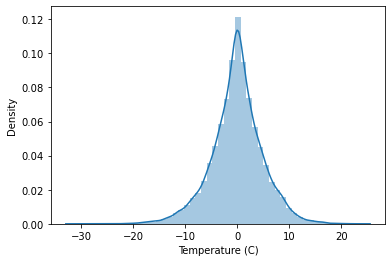

In [112]:
sns.distplot(y_test-pred6)

In [ ]:
# the graph shows the accuray of 0.73 
# random forest predict very well compare to other models